In [189]:
from sklearn.datasets import fetch_openml
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch
from torch import nn
import torch.nn.functional as F 
from torchvision import transforms
import cv2
import seaborn as sns

In [190]:
mnist = fetch_openml('mnist_784')

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [191]:
x,y = mnist['data'],mnist['target']

In [192]:
x.shape

(70000, 784)

In [193]:
y.shape

(70000,)

In [194]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

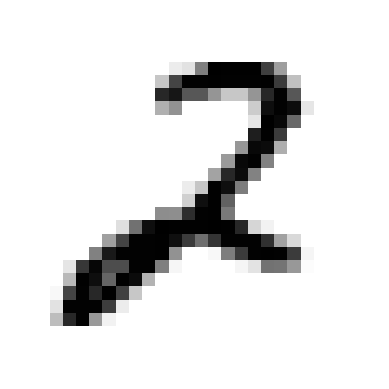

In [195]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [196]:
x_train, x_test = x[:60000],x[60000:]

In [197]:
y_train,y_test = y[:60000],y[60000:]

In [198]:

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = y_train==2
y_test_2 = y_test==2

In [199]:
y_train_2

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  


In [201]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train_2)
example = clf.predict([some_digit])
print(example)
print(clf.score(x_test,y_test_2))


c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[ True]
0.989


In [202]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train_2)
example_dt = clf.predict([some_digit])
print(dt.score(x_test,y_test_2))
print(example_dt)

0.9714
[ True]


c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [203]:
gbclf = GradientBoostingClassifier()
gbclf.fit(x_train,y_train_2)
example_gbclf = gbclf.predict([some_digit])
print(gbclf.score(x_test,y_test_2))
print(example_gbclf)

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.9851
[ True]


In [204]:
lr = LogisticRegression()
lr.fit(x_train,y_train_2)
example_lr = lr.predict([some_digit])
print(lr.score(x_test,y_test_2))
print(example_lr)

0.9802
[ True]


c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [205]:
abclf = AdaBoostClassifier()
abclf.fit(x_train,y_train_2)
example_abclf =abclf.predict([some_digit])
print(abclf.score(x_test,y_test_2))
print(example_abclf) 

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.9707
[ True]


In [206]:
xgbclf = XGBClassifier()
xgbclf.fit(x_train,y_train_2)
example_xgbclf =xgbclf.predict([some_digit])
print(xgbclf.score(x_test,y_test_2))
print(example_xgbclf) 

0.9942
[1]


In [207]:
svc = SVC()
svc.fit(x_train,y_train_2)
example_svc = svc.predict([some_digit])
print(svc.score(x_test,y_test_2))
print(example_svc) 

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9947
[ True]


In [208]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(svc, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9937999999999999


In [209]:
a

array([0.994 , 0.9937, 0.9937])

In [210]:
from torchvision import datasets

Train_size = 50000
Val_size = 10000
Test_size = 10000
hidden = 2
neural_list = [100,50,10]
image_resize=28
batch_size = 64

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),transforms.Resize((image_resize,image_resize)),transforms.ToTensor(),transforms.Normalize(0.1307,0.3081)])

data_train = datasets.MNIST(
    root='data',
    train = True,
    transform= transform,
    download=True
)
data_test =  datasets.MNIST(
    root='data',
    train = False,
    transform= transform,
    download=True
)
train_data,val_data = torch.utils.data.random_split(data_train,(Train_size,Val_size))
test_size = list(range(0,Test_size))

test_size = torch.utils.data.Subset(data_test,test_size)
test_data = torch.utils.data.Subset(data_test,test_size)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=True)

In [211]:
len(train_loader)
len(val_loader)
len(test_loader)

157

In [212]:
import torch.nn.functional as F
C = [100,50,10]
D=0.2
class Mnet(nn.Module):
    def __init__(self, input_dim=784, output_dim=C[-1], hidden_dim=C, drop_out=D):
        super(Mnet, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        current_dim = input_dim
        self.layers = nn.ModuleList()

        for hdim in hidden_dim:
            if hdim == hidden_dim[-1]:
                self.layers.append(nn.Dropout(drop_out))
                self.layers.append(nn.Linear(current_dim, hdim))
            else:
                self.layers.append(nn.Linear(current_dim, hdim))
                current_dim = hdim

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.leaky_relu(layer(x))
        output = F.softmax(self.layers[-1](x), dim=1)  # Apply softmax along dim=1
        return output

In [213]:
mnet = Mnet()

In [229]:
from torch import optim
import torch.nn as nn

train_loss_list = []
train_accuracy_list = []
n_train = len(train_loader)

epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
optimizer = optim.SGD(mnet.parameters(), lr=0.01, momentum=0.8)
loss_fn = nn.CrossEntropyLoss()

for e in range(epochs):
    mnet.train()
    correct = 0
    running_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(-1, image_resize * image_resize)
        net_out = mnet(data)

        optimizer.zero_grad()
        pred = net_out.data.max(1)[1]
        loss = loss_fn(net_out, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += pred.eq(target).sum().item()

        mean_val_loss = running_loss / (batch_idx + 1)
        accuracy = 100. * correct / ((batch_idx + 1) * train_loader.batch_size)
        train_accuracy_list.append(accuracy)
        train_loss_list.append(mean_val_loss)

        if batch_idx % 10 == 0:
            print('Epoch: ', e, 'Batch:', batch_idx, 'Loss:', mean_val_loss, 'Train Accuracy:', accuracy)


Epoch:  0 Batch: 0 Loss: 1.5014349222183228 Train Accuracy: 95.3125
Epoch:  0 Batch: 10 Loss: 1.5075460347262295 Train Accuracy: 96.02272727272727
Epoch:  0 Batch: 20 Loss: 1.501628807612828 Train Accuracy: 96.57738095238095
Epoch:  0 Batch: 30 Loss: 1.5027404523664905 Train Accuracy: 96.42137096774194
Epoch:  0 Batch: 40 Loss: 1.5079431126757366 Train Accuracy: 95.76981707317073
Epoch:  0 Batch: 50 Loss: 1.5103787066889744 Train Accuracy: 95.55759803921569
Epoch:  0 Batch: 60 Loss: 1.5088137974504565 Train Accuracy: 95.67110655737704
Epoch:  0 Batch: 70 Loss: 1.5090705542497231 Train Accuracy: 95.68661971830986
Epoch:  0 Batch: 80 Loss: 1.5094542488639737 Train Accuracy: 95.64043209876543
Epoch:  0 Batch: 90 Loss: 1.5088601256464864 Train Accuracy: 95.72458791208791
Epoch:  0 Batch: 100 Loss: 1.5094853214698263 Train Accuracy: 95.69925742574257
Epoch:  0 Batch: 110 Loss: 1.510186031058028 Train Accuracy: 95.62218468468468
Epoch:  0 Batch: 120 Loss: 1.5114926947049858 Train Accuracy: 9

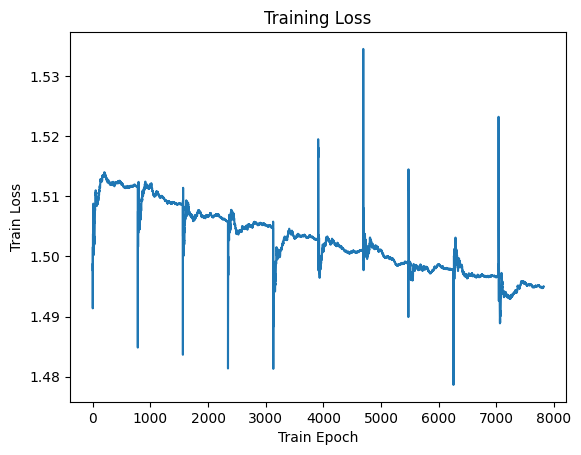

In [230]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)
plt.xlabel('Train Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss')
plt.show()


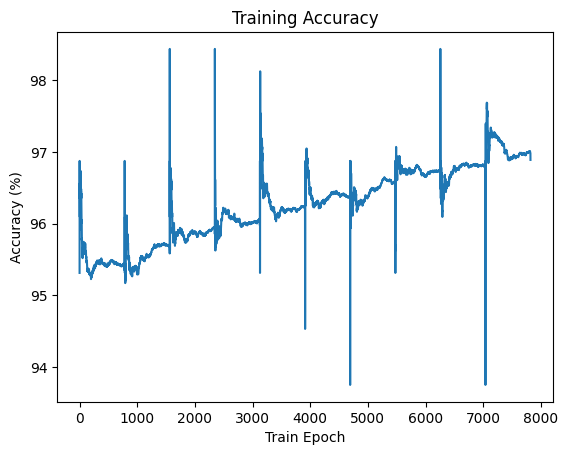

In [231]:
import matplotlib.pyplot as plt

plt.plot(train_accuracy_list)
plt.xlabel('Train Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.show()


In [232]:

def validation():
    global val_loss_list
    global val_accuracy_list
    n_test = len(val_loader)
    val_loss_list = []
    val_accuracy_list = []
    epochs=10
    for e in range(epochs):
        val_loss = 0
        correct = 0
        running_loss = 0  # Initialize running_loss here for each epoch
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(val_loader):
                data, target = data.to(device), target.to(device)
                data = data.view(-1, image_resize * image_resize)
                net_out = mnet(data)
                loss = loss_fn(net_out, target)
                pred = net_out.data.max(1)[1]
                #pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target).sum().item()
                running_loss += loss.item()
                val_accuracy = 100. * correct / ((batch_idx+1) * val_loader.batch_size)
                mean_val_loss = running_loss / (batch_idx + 1)
                val_accuracy_list.append(val_accuracy)
                val_loss_list.append(mean_val_loss)

                if batch_idx % 10 == 0:
                    print('Epoch: ', e, 'Batch:', batch_idx, 'Loss:', mean_val_loss, 'val Accuracy:', val_accuracy)

validation()

Epoch:  0 Batch: 0 Loss: 1.5304323434829712 val Accuracy: 93.75
Epoch:  0 Batch: 10 Loss: 1.5151553045619617 val Accuracy: 94.60227272727273
Epoch:  0 Batch: 20 Loss: 1.5102727299644834 val Accuracy: 95.16369047619048
Epoch:  0 Batch: 30 Loss: 1.509431327542951 val Accuracy: 95.36290322580645
Epoch:  0 Batch: 40 Loss: 1.5078977288269415 val Accuracy: 95.57926829268293
Epoch:  0 Batch: 50 Loss: 1.5062639432794906 val Accuracy: 95.80269607843137
Epoch:  0 Batch: 60 Loss: 1.505459861677201 val Accuracy: 95.87602459016394
Epoch:  0 Batch: 70 Loss: 1.5050406875744673 val Accuracy: 95.90669014084507
Epoch:  0 Batch: 80 Loss: 1.50443188055062 val Accuracy: 95.94907407407408
Epoch:  0 Batch: 90 Loss: 1.5035631709046415 val Accuracy: 96.05082417582418
Epoch:  0 Batch: 100 Loss: 1.5034280071164121 val Accuracy: 96.13242574257426
Epoch:  0 Batch: 110 Loss: 1.5033967860110171 val Accuracy: 96.11486486486487
Epoch:  0 Batch: 120 Loss: 1.5035954457669218 val Accuracy: 96.08729338842976
Epoch:  0 Bat

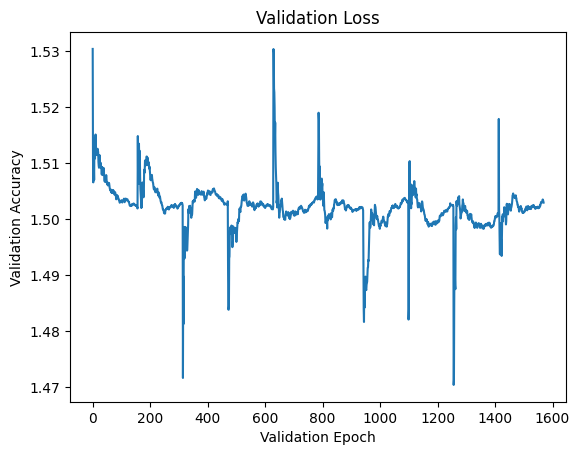

In [235]:

   

# Now you can plot val_loss_list
import matplotlib.pyplot as plt
plt.plot(val_loss_list)
plt.xlabel('Validation Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Loss')
plt.show()


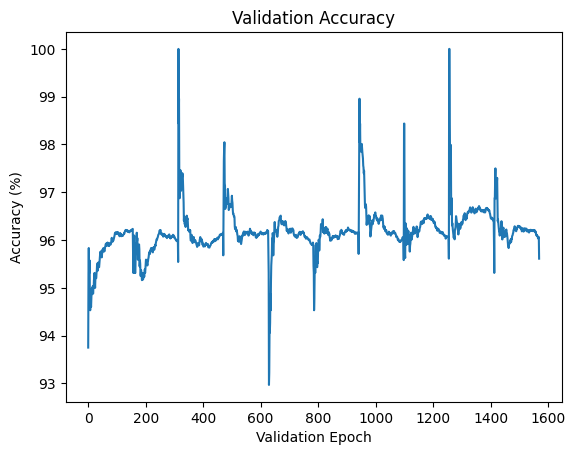

In [237]:
import matplotlib.pyplot as plt

plt.plot(val_accuracy_list)
plt.xlabel('Validation Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.show()
